# Neural Network Approximations
How Practical is the Universal Approximation Theorem?
<br>
<br>
Code for an article on the practical constriants of the universal approximation theorem. The article can be found *here*.

In [14]:
#imports
import numpy as np
import pandas as pd

import random
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
print(tf.__version__)

2.1.0


## Function 1: 
y = x^2 + x - 4      
-10 <= x<= 10

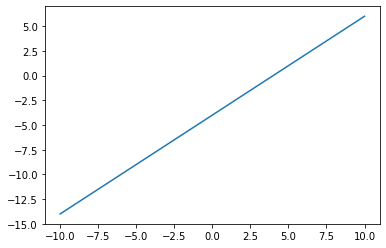

In [132]:
#Create data 
n_points = 100000

x = np.linspace(-10,10,n_points) #Create 1000 data points between -10 and 10
x_std = (x - x.min()) / (x.max() - x.min())
y =  x - 4

plt.plot(x, y) 


In [139]:
feat_x = tf.feature_column.numeric_column('x')

#cost = tf.reduce_mean(tf.squared_difference(ops,y))
#optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

dnn_model = tf.estimator.DNNRegressor(hidden_units=[100,100,100],
                                      feature_columns=[feat_x],
                                      
                                     activation_fn=tf.keras.activations.sigmoid) 

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/s2/82vv6ll16mn27w7gcdbccp3m0000gn/T/tmpku10i1yz', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [140]:
input_func = tf.compat.v1.estimator.inputs.numpy_input_fn(x={'x': x_std}, y=y, batch_size=100, num_epochs=1000,shuffle=True)

#input_func = tf.compat.v1.estimator.inputs. pandas_input_fn(x=x,y=y,batch_size=100,num_epochs=1,shuffle=True)
dnn_model.train(input_fn=input_func,steps=10000)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/s2/82vv6ll16mn27w7gcdbccp3m0000gn/T/tmpku10i1yz/model.ckpt.
INFO:tensorflow:loss = 0.0342435, step = 0
INFO:tensorflow:global_step/sec: 477.916
INFO:tensorflow:loss = 0.2648006, step = 100 (0.211 sec)
INFO:tensor

INFO:tensorflow:global_step/sec: 674.036
INFO:tensorflow:loss = 103.32717, step = 7300 (0.149 sec)
INFO:tensorflow:global_step/sec: 661.463
INFO:tensorflow:loss = 66.336075, step = 7400 (0.151 sec)
INFO:tensorflow:global_step/sec: 700.879
INFO:tensorflow:loss = 34.715122, step = 7500 (0.143 sec)
INFO:tensorflow:global_step/sec: 711.739
INFO:tensorflow:loss = 13.784557, step = 7600 (0.140 sec)
INFO:tensorflow:global_step/sec: 758.645
INFO:tensorflow:loss = 2.5633829, step = 7700 (0.132 sec)
INFO:tensorflow:global_step/sec: 726.96
INFO:tensorflow:loss = 0.20072907, step = 7800 (0.138 sec)
INFO:tensorflow:global_step/sec: 737.997
INFO:tensorflow:loss = 5.577992, step = 7900 (0.135 sec)
INFO:tensorflow:global_step/sec: 683.825
INFO:tensorflow:loss = 17.962751, step = 8000 (0.147 sec)
INFO:tensorflow:global_step/sec: 779.4
INFO:tensorflow:loss = 36.768627, step = 8100 (0.128 sec)
INFO:tensorflow:global_step/sec: 786.806
INFO:tensorflow:loss = 60.935253, step = 8200 (0.127 sec)
INFO:tensorfl

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/s2/82vv6ll16mn27w7gcdbccp3m0000gn/T/tmpku10i1yz/model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


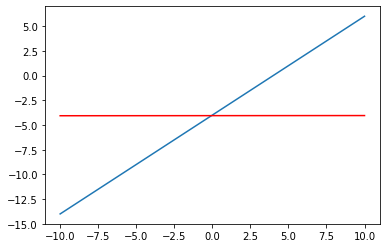

In [141]:
eval_input_func = tf.compat.v1.estimator.inputs.numpy_input_fn(
    x={'x': x_std}, 
    y=y, 
    batch_size=100, 
    num_epochs=1,
    shuffle=False)

predictions = []
for p in dnn_model.predict(input_fn=eval_input_func):
    predictions.append(p['predictions'])

plt.plot(x, y) 
plt.plot(x, predictions,'r') 

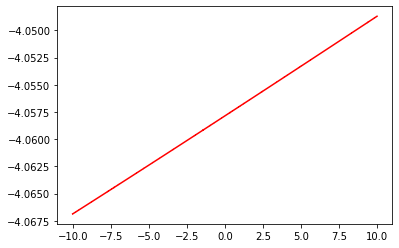

In [142]:
plt.plot(x, predictions,'r') 